In [1]:
import pandas as pd

# Load the crime data into a DataFrame
crime_data = pd.read_csv("Crime_Data_20240210.csv")

crime_data.head()

C:\Users\Tejas\AppData\Local\Temp\ipykernel_28536\2107490655.py:4: DtypeWarning: Columns (1,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv("Crime_Data_20240210.csv")


,Case and Offense,Case Number,Reported Date,Nature Of Call,From Date,Offense,Description,Block Address,City,State,Beat,Division,Council District,Attempt Complete,Location Type,Location Description,Location
0,180094593-35A,180094593,10/22/2018,NARCOTIC VIOLATIONS,10/22/2018 06:15:00 PM,35A,HSC 481.115(B) Poss CS PG 1 <1G 35A DRUG/NARCOTIC,700 CALIFORNIA PKWY N WB,FORT WORTH,TX,J13,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
1,200085517-90Z,200085517,11/03/2020,HARASS,08/12/2020 05:18:00 AM,90Z,PC 42.07(C) Harassment,1300 MARLBOROUGH DR,FORT WORTH,TX,I16,South,8.0,C,20.0,20 RESIDENCE/HOME,"(32.640426597727426, -97.33851074771222)"
2,210012743-240,210012743,02/20/2021,AUTO THEFT,02/20/2021 08:27:59 PM,240,PC 31.03(E)(4)(A)AUTO Theft>$1500<$20K (Auto t...,SANDY LN & EDERVILLE RD,FORT WORTH,TX,H15,East,5.0,C,18.0,18 PARKING LOT/GARAGE,NaN
3,190047946-35A,190047946,06/04/2019,NARCOTIC VIOLATIONS,06/04/2019 01:33:49 AM,35A,HSC 481.117(B) Poss CS PG 3 <28G 35A DRUG/NARC...,OAK GROVE RD / E IH 20 FWY EB,NaN,TX,I17,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
4,190031427-90D,190031427,04/13/2019,DWI,04/13/2019 02:44:37 AM,90D,PC 49.04 Driving While Intoxicated 90D DRIVING...,WEST FWY SR WB / GREEN OAKS RD,NaN,TX,L11,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN


In [2]:
# Selecting subset of columns
subset = crime_data[["Case Number", "From Date", "Nature Of Call", "Location"]]

subset.head()

,Case Number,From Date,Nature Of Call,Location
0,180094593,10/22/2018 06:15:00 PM,NARCOTIC VIOLATIONS,NaN
1,200085517,08/12/2020 05:18:00 AM,HARASS,"(32.640426597727426, -97.33851074771222)"
2,210012743,02/20/2021 08:27:59 PM,AUTO THEFT,NaN
3,190047946,06/04/2019 01:33:49 AM,NARCOTIC VIOLATIONS,NaN
4,190031427,04/13/2019 02:44:37 AM,DWI,NaN


In [3]:
# Number of rows before cleaning
rows_before_cleaning = subset.shape[0]
print("Number of rows before cleaning:", rows_before_cleaning)

# Remove rows with missing location values
cleaned_data = subset.dropna(subset=['Location'])

# Number of rows after cleaning
rows_after_cleaning = cleaned_data.shape[0]
print("Number of rows after cleaning:", rows_after_cleaning)


cleaned_data.head()


Number of rows before cleaning: 1305931
Number of rows after cleaning: 1281064


,Case Number,From Date,Nature Of Call,Location
1,200085517,08/12/2020 05:18:00 AM,HARASS,"(32.640426597727426, -97.33851074771222)"
5,210038831,05/22/2021 01:21:23 AM,ASSAULT,"(32.7645696823948, -97.22700512799878)"
8,210028773,04/18/2021 11:04:00 PM,AG ASSAULT,"(32.68435373680007, -97.26198404688067)"
9,190055743,06/28/2019 07:50:02 PM,ARSON,"(32.748462645443354, -97.31747166100152)"
11,210081343,10/09/2021 04:14:53 PM,ASSAULT BY THREAT,"(32.692104326130725, -97.25332588069044)"


In [4]:
# Convert 'From Date' column to datetime format
cleaned_data['From Date'] = pd.to_datetime(cleaned_data['From Date'], errors='coerce')

# Filter the cleaned_data DataFrame to keep only rows with 'From Date' in the last 5 years
filtered_data = cleaned_data[cleaned_data['From Date'].dt.year > 2018]

# Print the number of rows before and after filtering
print("Number of rows before filtering:", len(cleaned_data))
print("Number of rows after filtering:", len(filtered_data))

filtered_data.head()

Number of rows before filtering: 1281064
Number of rows after filtering: 287695


C:\Users\Tejas\AppData\Local\Temp\ipykernel_28536\738301821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['From Date'] = pd.to_datetime(cleaned_data['From Date'], errors='coerce')


,Case Number,From Date,Nature Of Call,Location
1,200085517,2020-08-12 05:18:00,HARASS,"(32.640426597727426, -97.33851074771222)"
5,210038831,2021-05-22 01:21:23,ASSAULT,"(32.7645696823948, -97.22700512799878)"
8,210028773,2021-04-18 23:04:00,AG ASSAULT,"(32.68435373680007, -97.26198404688067)"
9,190055743,2019-06-28 19:50:02,ARSON,"(32.748462645443354, -97.31747166100152)"
11,210081343,2021-10-09 16:14:53,ASSAULT BY THREAT,"(32.692104326130725, -97.25332588069044)"


In [5]:
# Split the 'Location' column into latitude and longitude components
cleaned_data[['Latitude', 'Longitude']] = cleaned_data['Location'].str.strip('()').str.split(', ', expand=True)

# Convert latitude and longitude to numeric
cleaned_data['Latitude'] = pd.to_numeric(cleaned_data['Latitude'])
cleaned_data['Longitude'] = pd.to_numeric(cleaned_data['Longitude'])

# Find the northeasternmost, northwesternmost, southeasternmost, and southwesternmost location values
northeast = (cleaned_data['Latitude'].max(), cleaned_data['Longitude'].max())
northwest = (cleaned_data['Latitude'].max(), cleaned_data['Longitude'].min())
southeast = (cleaned_data['Latitude'].min(), cleaned_data['Longitude'].max())
southwest = (cleaned_data['Latitude'].min(), cleaned_data['Longitude'].min())

# Print the results
print("Northeasternmost location:", northeast)
print("Northwesternmost location:", northwest)
print("Southeasternmost location:", southeast)
print("Southwesternmost location:", southwest)

C:\Users\Tejas\AppData\Local\Temp\ipykernel_28536\3541204365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['Latitude', 'Longitude']] = cleaned_data['Location'].str.strip('()').str.split(', ', expand=True)
C:\Users\Tejas\AppData\Local\Temp\ipykernel_28536\3541204365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['Latitude', 'Longitude']] = cleaned_data['Location'].str.strip('()').str.split(', ', expand=True)
C:\Users\Tejas\AppData\Local\Temp\ipykernel_28536\3541204365.p

Northeasternmost location: (33.04838570688878, -97.03398575738294)
Northwesternmost location: (33.04838570688878, -97.59986520191327)
Southeasternmost location: (32.55303567867901, -97.03398575738294)
Southwesternmost location: (32.55303567867901, -97.59986520191327)


C:\Users\Tejas\AppData\Local\Temp\ipykernel_28536\3541204365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Longitude'] = pd.to_numeric(cleaned_data['Longitude'])


In [6]:
import numpy as np

# Define the boundaries of the grid based on the four corners found previously
lat_min, lat_max = southwest[0], northeast[0]
lon_min, lon_max = southwest[1], northeast[1]

# Calculate the latitude and longitude intervals for the grid
lat_interval = (lat_max - lat_min) / 10
lon_interval = (lon_max - lon_min) / 10

# Create a 10x10 grid with integer values
grid = np.zeros((10, 10), dtype=int)

# Iterate over the data and increment the corresponding grid value for each crime
for index, row in cleaned_data.iterrows():
    lat_index = int((row['Latitude'] - lat_min) // lat_interval)
    lon_index = int((row['Longitude'] - lon_min) // lon_interval)
    
    # Ensure that the index falls within the grid
    lat_index = min(max(lat_index, 0), 9)
    lon_index = min(max(lon_index, 0), 9)
    
    grid[lat_index, lon_index] += 1

# Print the grid
print("Grid with crime counts:")
print(grid)

Grid with crime counts:
[[     0      0     17    879   7734   3092      5      0      0      0]
 [     0      3    202  30829  62870   8315    179      0      0      0]
 [     0    262   2731  67496  82186  37802  15146      0      0      0]
 [   228   6546  79232  54971 117957 127847  82662   6008      0      0]
 [     0   5947   7641  25954 106941  49810  49346  36533     42      0]
 [     0    389   2297  24878  29162  17101     17   1879   3105  15348]
 [     0     97   2419   9877  10704  37798     62      0      0      0]
 [     0      0    122   1724   8413  18842    771      0      0      0]
 [     0      0      0   3674    542   8109   1433      0      0      0]
 [     0      0      0      7   1359   3434     88      0      0      0]]


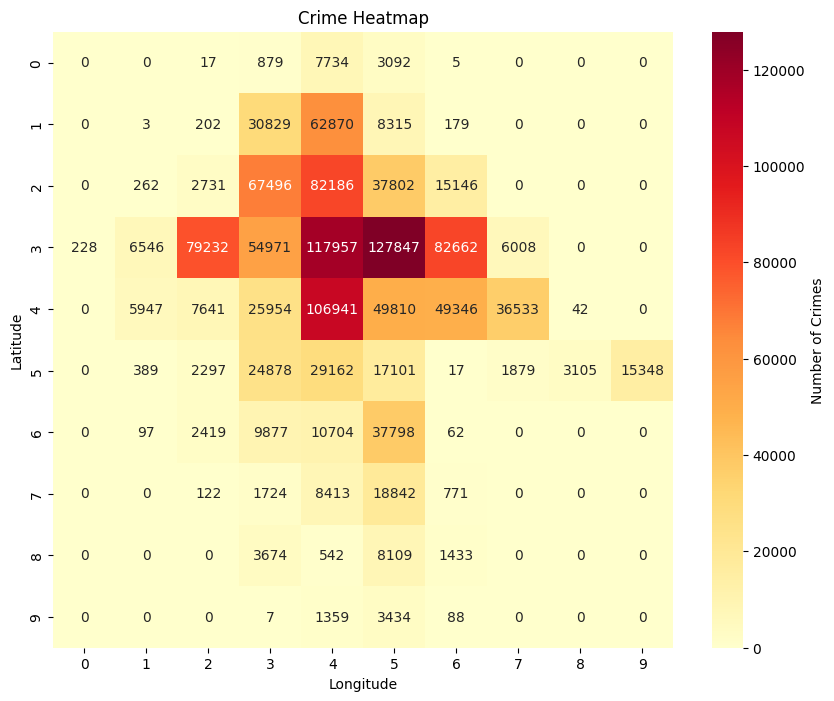

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grid, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crime Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [9]:
# Load the Neighborhood Profile Area Data
neighborhood_data = pd.read_csv("Neighborhood_Profile_Area_Data_20240214.csv")

neighborhood_data.head()

,ADDRESS,ZIPCODE,LAST_UPDATE_DATE,YEAR,NPA_NAME,LATITUDE,LONGITUDE,Location_1,SCHOOL_DISTRICT,POPULATION_2010,...,COMMERCIAL_BLD_PERMITS,RESIDENTIAL_BLD_PERMITS,REPORTED_S,EMERGENCY_,PCT_POOR_STREETS,SANITARY_SEWER_OVERFLOW_RATE,PCT_NEAR_GROCERY_STORE,PCT_NEAR_PARK,PCT_NEAR_LIBRARY,PCT_VOTER_TURNOUT
0,1100 WATER CANNA DR,76247,2024-02-11 09:22:35.3033333,2016,Harriet Creek Ranch,33.0512,-97.3337,"(33.0512,-97.3337)",NORTHWEST ISD,6620,...,0,3,0,17,0.0,0,0.000000,0.579601,0.0,0.0
1,14840 GENTRY DR,76108,2024-02-11 09:22:35.3033333,2017,Walsh Ranch,32.7479,-97.5893,"(32.7479,-97.5893)",ALEDO ISD,1895,...,2,1,0,0,0.0,0,0.000000,0.000000,0.0,0.0
2,2368 LONGSPUR DR,76008,2024-02-11 09:22:35.3033333,2016,Walsh Ranch,32.7327,-97.5736,"(32.7327,-97.5736)",ALEDO ISD,1895,...,0,0,0,0,0.0,0,0.000000,0.000000,0.0,0.0
3,805 HIGH WOODS TR,76112,2024-02-11 09:22:35.3033333,2017,Woodhaven,32.7685,-97.2233,"(32.7685,-97.2233)",FORT WORTH ISD,9151,...,16,17,24,0,0.0,0,0.702765,0.213091,1.0,0.0
4,1029 SUPERBLOOM AVE,76247,2024-02-11 09:22:35.3033333,2017,Harriet Creek Ranch,33.0503,-97.3349,"(33.0503,-97.3349)",NORTHWEST ISD,6620,...,0,0,1,0,0.0,0,0.000000,0.627845,0.0,0.0


In [13]:
# Create a subset of the data with 'MEDIAN_HOUSEHOLD_INCOME', 'LATITUDE', and 'LONGITUDE' columns
income_data = neighborhood_data[['MEDIAN_HOUSEHOLD_INCOME', 'LATITUDE', 'LONGITUDE']]

# Remove rows with missing values
income_data_cleaned = income_data.dropna()

# Display the first few rows of the subset
print(income_data_cleaned.head())


   MEDIAN_HOUSEHOLD_INCOME  LATITUDE  LONGITUDE
0                    86556   33.0512   -97.3337
1                   129333   32.7479   -97.5893
2                   139353   32.7327   -97.5736
3                    27647   32.7685   -97.2233
4                    86814   33.0503   -97.3349


In [14]:
# Define the boundaries of the grid based on the four corners found previously
lat_min, lat_max = southwest[0], northeast[0]
lon_min, lon_max = southwest[1], northeast[1]

# Calculate the latitude and longitude intervals for the grid
lat_interval = (lat_max - lat_min) / 10
lon_interval = (lon_max - lon_min) / 10

# Create an empty 10x10 grid to store average median household incomes
grid = np.zeros((10, 10), dtype=float)

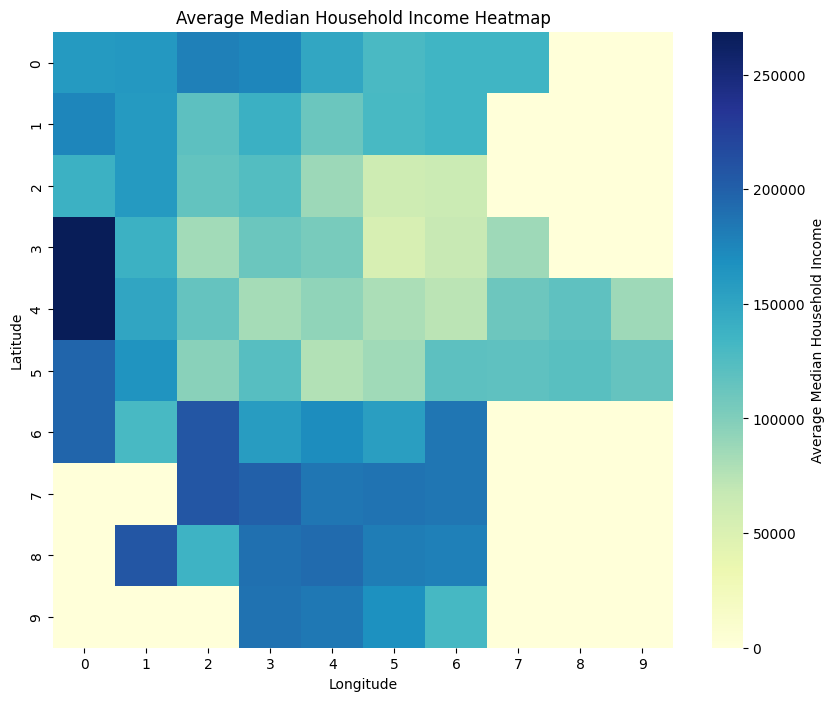

In [25]:
# Create a DataFrame to store the count of data points in each cell
count_df = pd.DataFrame(np.zeros((10, 10)), index=np.arange(10), columns=np.arange(10))

# Iterate over the data and calculate the average median household income for each cell
for index, row in income_data_cleaned.iterrows():
    lat_index = int((row['LATITUDE'] - lat_min) // lat_interval)
    lon_index = int((row['LONGITUDE'] - lon_min) // lon_interval)
    
    # Ensure that the index falls within the grid
    lat_index = min(max(lat_index, 0), 9)
    lon_index = min(max(lon_index, 0), 9)
    
    # Increment the count of data points in the cell
    count_df.loc[lat_index, lon_index] += 1
    
    # Update the total income for the cell
    grid[lat_index, lon_index] += row['MEDIAN_HOUSEHOLD_INCOME']

# Calculate the average income for each cell
for i in range(10):
    for j in range(10):
        if count_df.iloc[i, j] != 0:
            grid[i, j] /= count_df.iloc[i, j]

# Create a Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grid, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Average Median Household Income'})
plt.title('Average Median Household Income Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [30]:
# Create an empty 10x10 grid to store the ratio of median household income to crime
ratio_grid = np.zeros((10, 10), dtype=float)

# Iterate over the data and calculate the ratio of median household income to crime for each cell
for index, row in income_data_cleaned.iterrows():
    lat_index = int((row['LATITUDE'] - lat_min) // lat_interval)
    lon_index = int((row['LONGITUDE'] - lon_min) // lon_interval)
    
    # Ensure that the index falls within the grid
    lat_index = min(max(lat_index, 0), 9)
    lon_index = min(max(lon_index, 0), 9)
    
    # Calculate the ratio of median household income to crime for the cell
    if grid[lat_index, lon_index] != 0:
        ratio_grid[lat_index, lon_index] = row['MEDIAN_HOUSEHOLD_INCOME'] / grid[lat_index, lon_index]


In [35]:
# Find the cell with the greatest ratio of median household income to crime
max_ratio = np.max(ratio_grid)
max_ratio_cell = np.unravel_index(np.argmax(ratio_grid, axis=None), ratio_grid.shape)

# Print the maximum ratio and its cell coordinates
print("Maximum ratio of median household income to crime:", max_ratio)
print("Cell coordinates with maximum ratio:", max_ratio_cell)

# Extract the coordinates of the cell with the maximum ratio
max_ratio_lat, max_ratio_lon = max_ratio_cell

# Retrieve the median income and crime count for the cell with the maximum ratio
median_income = grid[max_ratio_lat, max_ratio_lon]
crime_count = ratio_grid[max_ratio_lat, max_ratio_lon]

# Print the median income and crime count for the cell
print("Median household income for the cell:", median_income)
print("Crime count for the cell:", crime_count)

# Calculate the latitude and longitude for the cell with the maximum ratio
max_ratio_lat_center = lat_min + (max_ratio_lat + 0.5) * lat_interval
max_ratio_lon_center = lon_min + (max_ratio_lon + 0.5) * lon_interval

# Print the latitude and longitude for the cell
print("Latitude for the cell:", max_ratio_lat_center)
print("Longitude for the cell:", max_ratio_lon_center)

Maximum ratio of median household income to crime: 0.7945199271724841
Cell coordinates with maximum ratio: (4, 3)
Median household income for the cell: 83087.90974561505
Crime count for the cell: 0.7945199271724841
Latitude for the cell: 32.77594319137341
Longitude for the cell: -97.40180739632765


In [38]:
# Key Insights
# Find the cell with the maximum median household income
max_income_cell = np.unravel_index(np.argmax(grid, axis=None), grid.shape)
max_income_value = grid[max_income_cell]

# Find the cell with the minimum median household income
min_income_cell = np.unravel_index(np.argmin(grid, axis=None), grid.shape)
min_income_value = grid[min_income_cell]

# Calculate the average median household income across all cells
average_income = np.mean(grid)

# Find the cell with the maximum number of crimes
max_crime_cell = np.unravel_index(np.argmax(ratio_grid, axis=None), ratio_grid.shape)
max_crime_value = ratio_grid[max_crime_cell]

# Find the cell with the minimum number of crimes
min_crime_cell = np.unravel_index(np.argmin(ratio_grid, axis=None), ratio_grid.shape)
min_crime_value = ratio_grid[min_crime_cell]

# Calculate the average number of crimes across all cells
average_crime = np.mean(ratio_grid)

# Print the results
print("Cell with maximum median household income:", max_income_cell)
print("Maximum median household income:", max_income_value)

print("Cell with minimum median household income:", min_income_cell)
print("Minimum median household income:", min_income_value)

print("Cell with maximum number of crimes:", max_crime_cell)
print("Maximum number of crimes:", max_crime_value)

print("Cell with minimum number of crimes:", min_crime_cell)
print("Minimum number of crimes:", min_crime_value)

print("Average median household income across all cells:", average_income)
print("Average number of crimes across all cells:", average_crime)

Cell with maximum median household income: (4, 0)
Maximum median household income: 268686.0
Cell with minimum median household income: (0, 8)
Minimum median household income: 0.0
Cell with maximum number of crimes: (4, 3)
Maximum number of crimes: 0.7945199271724841
Cell with minimum number of crimes: (0, 8)
Minimum number of crimes: 0.0
Average median household income across all cells: 101855.43813770264
Average number of crimes across all cells: 0.3639003828088691
